In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)
pd.options.mode.chained_assignment = None

In [2]:
# read in dataframe
df_orig = pd.read_csv('final_data_files/uncrowded_withresid_m4.csv')

df = df_orig[(np.isfinite(df_orig.mag_j)) & (np.isfinite(df_orig.mag_h)) & (np.isfinite(df_orig.mag_k)) &
        (np.isfinite(df_orig.mag_3)) & (np.isfinite(df_orig.mag_4))]

df1 = df[df.type == 0]
df2 = df[df.type == 1]

# show column names for reference
print df.columns.values

['id' 'mag_j' 'merr_j' 'type' 'per' 'mag_h' 'merr_h' 'mag_k' 'merr_k'
 'mag_3' 'merr_3' 'mag_4' 'merr_4' 'resid_m4_j' 'resid_m4_h' 'resid_m4_k'
 'resid_m4_3' 'resid_m4_4']


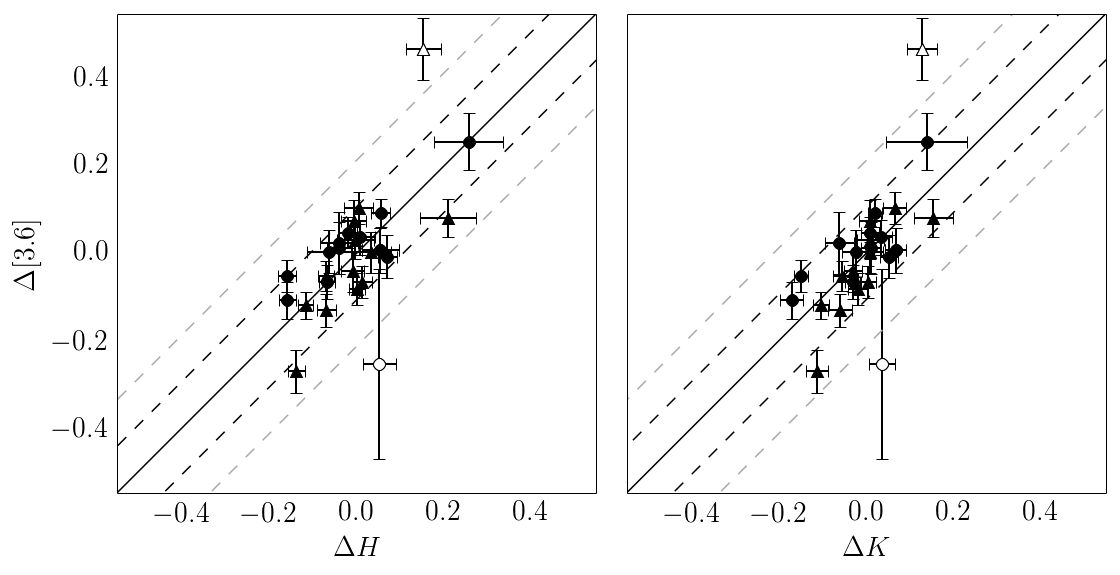

In [5]:
df['resid_h_3'] = df['resid_m4_h'] - df['resid_m4_3']
df['resid_k_3'] = df['resid_m4_k'] - df['resid_m4_3']
fig = plt.figure(figsize=(8,5))
j = 1
xspace = np.linspace(-1,1,10)
for i in ['h','k']:
    df['resid_' + i + '_3'] = df['resid_m4_' + i] - df['resid_m4_3']
    if i == 'h':
        clipped_h = sigma_clip(df['resid_h_3'], 2)
        bad_only_h = df[clipped_h.mask]
        bad_only_h0 = bad_only_h[bad_only_h.type == 0]
        bad_only_h1 = bad_only_h[bad_only_h.type == 1]
    if i == 'k':
        clipped_k = sigma_clip(df['resid_k_3'], 2)
        bad_only_k = df[clipped_k.mask]
        bad_only_k0 = bad_only_k[bad_only_k.type == 0]
        bad_only_k1 = bad_only_k[bad_only_k.type == 1]
    ax = fig.add_subplot(1,2,j, aspect='equal')
    sig = np.std(df['resid_' + i + '_3'])
    ppl.plot(ax, xspace, xspace, 'k-')
    ppl.plot(ax, xspace, xspace + sig, 'k--')
    ppl.plot(ax, xspace, xspace - sig, 'k--')
    ppl.plot(ax, xspace, xspace + 2*sig, '--', color='#AAAAAA')
    ppl.plot(ax, xspace, xspace - 2*sig, '--', color='#AAAAAA')
    ax.errorbar(df1['resid_m4_' + i], df1['resid_m4_3'],
                xerr=df1['merr_' + i], yerr=df1['merr_3'], fmt='o', color='k')
    ax.errorbar(df2['resid_m4_' + i], df2['resid_m4_3'],
                xerr=df2['merr_' + i], yerr=df2['merr_3'], fmt='^', color='k')
    if i == 'h':
        ax.plot(bad_only_h0['resid_m4_h'], bad_only_h0['resid_m4_3'], 'o', color='w')
        ax.plot(bad_only_h1['resid_m4_h'], bad_only_h1['resid_m4_3'], '^', color='w')
        ax.set_ylabel('$\Delta [3.6]$')
    if i == 'k':
        ax.plot(bad_only_k0['resid_m4_k'], bad_only_k0['resid_m4_3'], 'o', color='w')
        ax.plot(bad_only_k1['resid_m4_k'], bad_only_k1['resid_m4_3'], '^', color='w')
        ax.set_yticks([])
    ax.set_ylim(-0.55,0.55)
    ax.set_xlim(ax.get_ylim())
    ax.set_xlabel('$\Delta {}$'.format(i.upper()))
    j += 1
fig.tight_layout()

In [4]:
bad_only_h

,id,mag_j,merr_j,type,per,mag_h,merr_h,mag_k,merr_k,mag_3,merr_3,mag_4,merr_4,resid_m4_j,resid_m4_h,resid_m4_k,resid_m4_3,resid_m4_4,resid_h_3,resid_k_3
64,103,13.620342,0.017550,1,0.328852,13.409081,0.040005,13.376559,0.033546,12.959676,0.070904,13.024156,0.066239,0.108284,0.152610,0.128188,0.469198,0.393236,-0.316589,-0.341011
67,107,13.596613,0.017088,0,0.514102,13.339657,0.037823,13.300744,0.030043,13.535131,0.218684,13.350744,0.076410,0.031871,0.052246,0.037048,-0.253647,-0.100279,0.305894,0.290695


In [5]:
bad_only_k

,id,mag_j,merr_j,type,per,mag_h,merr_h,mag_k,merr_k,mag_3,merr_3,mag_4,merr_4,resid_m4_j,resid_m4_h,resid_m4_k,resid_m4_3,resid_m4_4,resid_h_3,resid_k_3
64,103,13.620342,0.017550,1,0.328852,13.409081,0.040005,13.376559,0.033546,12.959676,0.070904,13.024156,0.066239,0.108284,0.152610,0.128188,0.469198,0.393236,-0.316589,-0.341011
67,107,13.596613,0.017088,0,0.514102,13.339657,0.037823,13.300744,0.030043,13.535131,0.218684,13.350744,0.076410,0.031871,0.052246,0.037048,-0.253647,-0.100279,0.305894,0.290695
